# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
import time
from statistics import mean
from sklearn.dummy import DummyClassifier

In [4]:
df = pd.read_csv('Loan_Data.csv')

# Inspecting and Cleaning the Data

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#checking for missing values
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                   Total   Percent
Credit_History        50  0.081433
Self_Employed         32  0.052117
LoanAmount            22  0.035831
Dependents            15  0.024430
Loan_Amount_Term      14  0.022801
Gender                13  0.021173
Married                3  0.004886
Loan_ID                0  0.000000
Education              0  0.000000
ApplicantIncome        0  0.000000
CoapplicantIncome      0  0.000000
Property_Area          0  0.000000
Loan_Status            0  0.000000


In [8]:
#Dropping nulls from tihs column
df = df[df['Credit_History'].notnull()]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             552 non-null    object 
 2   Married            561 non-null    object 
 3   Dependents         549 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      538 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         543 non-null    float64
 9   Loan_Amount_Term   550 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 61.7+ KB


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,564.000000,564.000000,543.000000,550.000000,564.000000
mean,5466.436170,1530.448440,145.088398,342.152727,0.842199
std,6271.344106,2471.721359,83.309428,64.586272,0.364878
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2892.750000,0.000000,100.000000,360.000000,1.000000
50%,3815.000000,1105.500000,127.000000,360.000000,1.000000
75%,5803.750000,2250.000000,165.500000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


In [12]:
#Filling nulls from these columns with the mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [13]:
#Filling nulls from these columns with the mean
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [14]:
#checking for missing values
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                   Total  Percent
Loan_ID                0      0.0
Gender                 0      0.0
Married                0      0.0
Dependents             0      0.0
Education              0      0.0
Self_Employed          0      0.0
ApplicantIncome        0      0.0
CoapplicantIncome      0      0.0
LoanAmount             0      0.0
Loan_Amount_Term       0      0.0
Credit_History         0      0.0
Property_Area          0      0.0
Loan_Status            0      0.0


In [15]:
#checking for duplicated rows
total_duplicated = df.duplicated().sum()
print(total_duplicated)

0


In [16]:
#checking for non numeric values in numeric columns
for column_name in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    print("Problematic values in column: {}".format(column_name))
    for value in df[column_name]:
        try:
            float(value)
        except:
            print(value)

Problematic values in column: ApplicantIncome
Problematic values in column: CoapplicantIncome
Problematic values in column: LoanAmount
Problematic values in column: Loan_Amount_Term
Problematic values in column: Credit_History


In [17]:
#checking for odd values in categorical columns and dropping if needed
df.Gender.value_counts()

Male      463
Female    101
Name: Gender, dtype: int64

In [18]:
df.Married.value_counts()

Yes    365
No     199
Name: Married, dtype: int64

In [19]:
df.Dependents.value_counts()

0     331
2      95
1      90
3+     48
Name: Dependents, dtype: int64

In [20]:
df.Education.value_counts()

Graduate        443
Not Graduate    121
Name: Education, dtype: int64

In [21]:
df.Self_Employed.value_counts()

No     489
Yes     75
Name: Self_Employed, dtype: int64

In [22]:
df.Property_Area.value_counts()

Semiurban    217
Urban        182
Rural        165
Name: Property_Area, dtype: int64

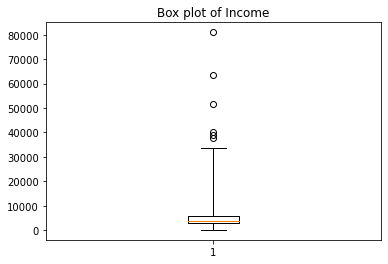

In [23]:
#checking for outliers and dropping if they seem to be a mistake, or a special case that wouldn't fit the model
plt.boxplot(df['ApplicantIncome'], whis=10)
plt.title('Box plot of Income')
plt.show()

In [24]:
#checking for outliers and dropping if they seem to be a mistake, or a special case that wouldn't fit the model
df.Loan_Amount_Term.value_counts()

360.000000    470
180.000000     43
342.152727     14
480.000000     14
300.000000     10
120.000000      3
240.000000      3
84.000000       3
60.000000       2
36.000000       2
Name: Loan_Amount_Term, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             564 non-null    object 
 2   Married            564 non-null    object 
 3   Dependents         564 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      564 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         564 non-null    float64
 9   Loan_Amount_Term   564 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 61.7+ KB


# Visualizing the Data

Text(0.5, 1.0, 'Applicant Income')

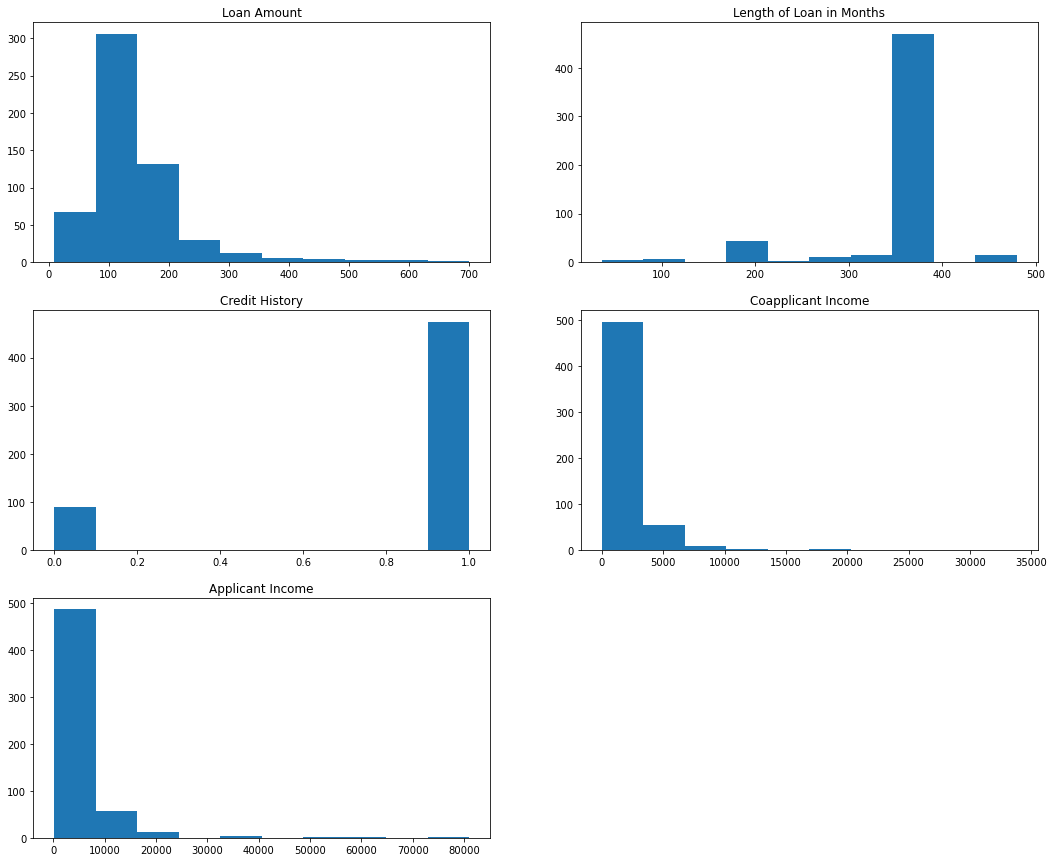

In [27]:
#visualizing the data
plt.figure(figsize=(18,15))

plt.subplot(3, 2, 1)
plt.hist(df["LoanAmount"])
plt.title("Loan Amount")

plt.subplot(3, 2, 2)
plt.hist(df["Loan_Amount_Term"])
plt.title("Length of Loan in Months")

plt.subplot(3, 2, 3)
plt.hist(df["Credit_History"])
plt.title("Credit History")

plt.subplot(3, 2, 4)
plt.hist(df["CoapplicantIncome"])
plt.title("Coapplicant Income")

plt.subplot(3, 2, 5)
plt.hist(df["ApplicantIncome"])
plt.title("Applicant Income")

In [28]:
#dropping Loan_ID as it is not needed
df = df.drop('Loan_ID', axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             564 non-null    object 
 1   Married            564 non-null    object 
 2   Dependents         564 non-null    object 
 3   Education          564 non-null    object 
 4   Self_Employed      564 non-null    object 
 5   ApplicantIncome    564 non-null    int64  
 6   CoapplicantIncome  564 non-null    float64
 7   LoanAmount         564 non-null    float64
 8   Loan_Amount_Term   564 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      564 non-null    object 
 11  Loan_Status        564 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.3+ KB


In [30]:
# One-Hot encoding for categorical variables
gender_df = pd.get_dummies(df['Gender'], drop_first=True)
married_df = pd.get_dummies(df['Married'], drop_first=True)
dependents_df = pd.get_dummies(df['Dependents'], drop_first=True)
education_df = pd.get_dummies(df['Education'], drop_first=True)
selfemployed_df = pd.get_dummies(df['Self_Employed'], drop_first=True)
propertyarea_df = pd.get_dummies(df['Property_Area'], drop_first=True)

In [31]:
features_df = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',]]

In [32]:
features_df = features_df.merge(gender_df, left_index=True, right_index=True)
features_df = features_df.merge(married_df, left_index=True, right_index=True)
features_df = features_df.merge(dependents_df, left_index=True, right_index=True)
features_df = features_df.merge(education_df, left_index=True, right_index=True)
features_df = features_df.merge(selfemployed_df, left_index=True, right_index=True)
features_df = features_df.merge(propertyarea_df, left_index=True, right_index=True)

In [33]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    564 non-null    int64  
 1   CoapplicantIncome  564 non-null    float64
 2   LoanAmount         564 non-null    float64
 3   Loan_Amount_Term   564 non-null    float64
 4   Credit_History     564 non-null    float64
 5   Male               564 non-null    uint8  
 6   Yes_x              564 non-null    uint8  
 7   1                  564 non-null    uint8  
 8   2                  564 non-null    uint8  
 9   3+                 564 non-null    uint8  
 10  Not Graduate       564 non-null    uint8  
 11  Yes_y              564 non-null    uint8  
 12  Semiurban          564 non-null    uint8  
 13  Urban              564 non-null    uint8  
dtypes: float64(4), int64(1), uint8(9)
memory usage: 47.6 KB


In [34]:
features_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes_x,1,2,3+,Not Graduate,Yes_y,Semiurban,Urban
0,5849,0.0,145.088398,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1


# Running our Models

In [35]:
#splitting into train and test sets

X = features_df
Y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 451
The number of observations in test set is 113


In [36]:
#setting a baseline using dummy classifier
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.6814159292035398

In [37]:
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=10000, random_state=2)
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.8292682926829268
Score on test data:  0.7876106194690266


In [38]:
lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', C=0.75, max_iter=10000, random_state=2)
lr_regularized.fit(X_train, y_train)

test_score = lr_regularized.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.8159645232815964
Score on test data:  0.8230088495575221


In [39]:
lr_reg_pred = lr.predict(X_test)
print(classification_report(y_test, lr_reg_pred))

              precision    recall  f1-score   support

           N       0.75      0.50      0.60        36
           Y       0.80      0.92      0.86        77

    accuracy                           0.79       113
   macro avg       0.77      0.71      0.73       113
weighted avg       0.78      0.79      0.77       113



In [42]:
confusion = confusion_matrix(y_test, lr_reg_pred)
print(confusion)

[[18 18]
 [ 6 71]]


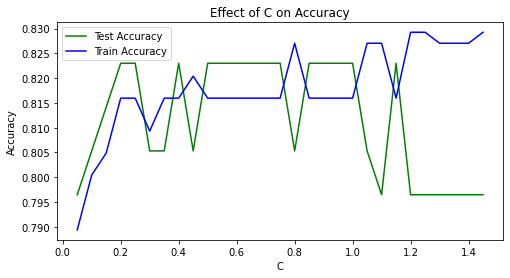

In [43]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000, random_state=2)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [44]:
#cross fold validationg with logistic regression

lr_clf = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)
lr_cv_scores = cross_val_score(lr_clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', lr_cv_scores)
print('Mean cross validation score: {:.3f}'.format(mean(lr_cv_scores)))

Accuracy scores for the 5 folds:  [0.85714286 0.8        0.84444444 0.76666667 0.76666667]
Mean cross validation score: 0.807


In [45]:
#attempting with a Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.58      0.58      0.58        36
           Y       0.81      0.81      0.81        77

    accuracy                           0.73       113
   macro avg       0.69      0.69      0.69       113
weighted avg       0.73      0.73      0.73       113



In [46]:
accuracy_score(y_test,y_pred)

0.7345132743362832

In [47]:
start = time.time()

s=0
for i in range(1,10):
    dt=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    dt.fit(X_train,y_train)
    y_pred=dt.predict(X_test)
    ss=accuracy_score(y_test,y_pred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')

0.8141592920353983 1
Time elapsed: 0.02 seconds.


In [48]:
#attempting with Random Forest
start = time.time()

rfc=RandomForestClassifier(n_estimators=102)
rfc.fit(X_train,y_train)
ypred=rfc.predict(X_test)

cvs=cross_val_score(rfc,X,Y,cv=10,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')

CVS: [0.84210526 0.8245614  0.75438596 0.73684211 0.75       0.85714286
 0.82142857 0.73214286 0.80357143 0.85714286]
CVS Mean: 0.7979323308270676
CVS Standard Deviation: 0.047444774097413406
Time elapsed: 1.14 seconds.


In [49]:
#attempting with Gradient Boosting

params = {'n_estimators': 150,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=4, n_estimators=150)

In [157]:
clf.score(X_test, y_test)

0.7876106194690266

<AxesSubplot:>

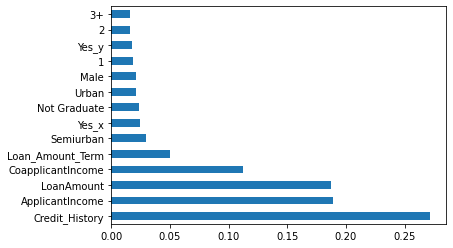

In [50]:
import matplotlib.pyplot as plt

rfc.fit(X, Y)

feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

Summary:

The best model was the regularized logistic regression model